<a href="https://colab.research.google.com/github/Saketh2611/House-Price-Prediction/blob/main/House_Price__prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import files
uploaded = files.upload()

Saving HousePricePrediction (1).xlsx to HousePricePrediction (1).xlsx


# IMPORTING NECESSARY LIBRARIES 📚

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

LOAD DATASETS

In [4]:
file = "HousePricePrediction (1).xlsx" #replace with correct path if needed
dataset = pd.read_excel(file)

# Displaying First five rows and Dataset shape 🧾

In [5]:
# Display the first 5 rows
print(dataset.head())

# Dataset shape
print("Dataset shape:", dataset.shape)

   Id  MSSubClass MSZoning  LotArea LotConfig BldgType  OverallCond  \
0   0          60       RL     8450    Inside     1Fam            5   
1   1          20       RL     9600       FR2     1Fam            8   
2   2          60       RL    11250    Inside     1Fam            5   
3   3          70       RL     9550    Corner     1Fam            5   
4   4          60       RL    14260       FR2     1Fam            5   

   YearBuilt  YearRemodAdd Exterior1st  BsmtFinSF2  TotalBsmtSF  SalePrice  
0       2003          2003     VinylSd         0.0        856.0   208500.0  
1       1976          1976     MetalSd         0.0       1262.0   181500.0  
2       2001          2002     VinylSd         0.0        920.0   223500.0  
3       1915          1970     Wd Sdng         0.0        756.0   140000.0  
4       2000          2000     VinylSd         0.0       1145.0   250000.0  
Dataset shape: (2919, 13)


# Identifying Categorial 🔤 and numerical variables 🔢

In [6]:
# Identifying categorical and numerical variables
obj = (dataset.dtypes == 'object')
object_cols = list(obj[obj].index)

print("Categorical variables:", len(object_cols))
print(object_cols)

int_ = (dataset.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:", len(num_cols))

fl = (dataset.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:", len(fl_cols))

Categorical variables: 4
['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st']
Integer variables: 6
Float variables: 3


# CORRELATION HEATMAP OF NUMERICAL CATEGORIES 🟩🟨🟥

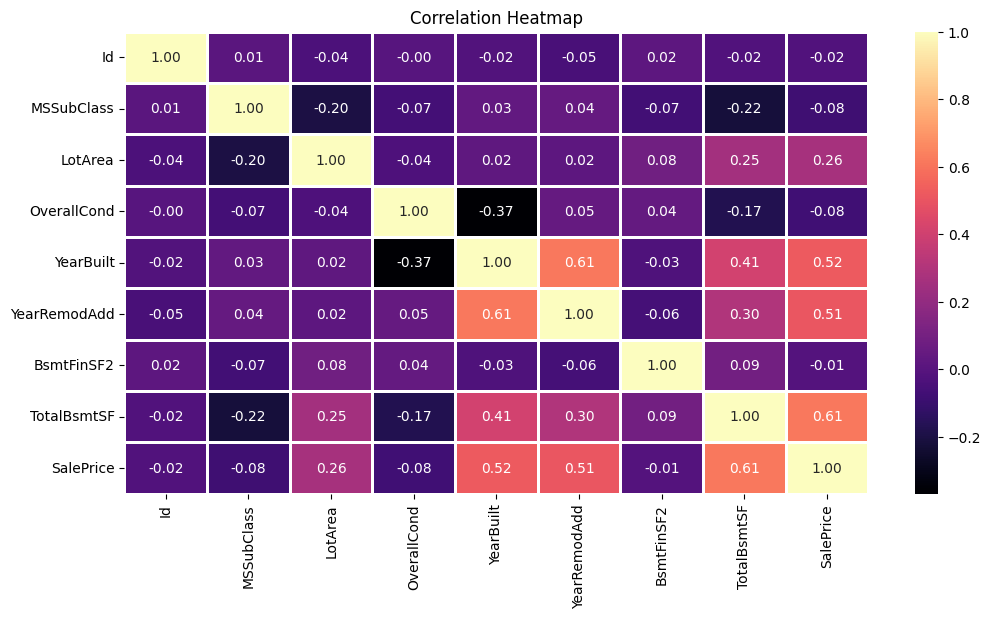

In [7]:
numerical_dataset = dataset.select_dtypes(include=['number'])
plt.figure(figsize=(12, 6))
sns.heatmap(numerical_dataset.corr(), cmap='magma', fmt='.2f', linewidths=2, annot=True)
plt.title("Correlation Heatmap")
plt.show()

# Unique Values of Categorical Features 📊

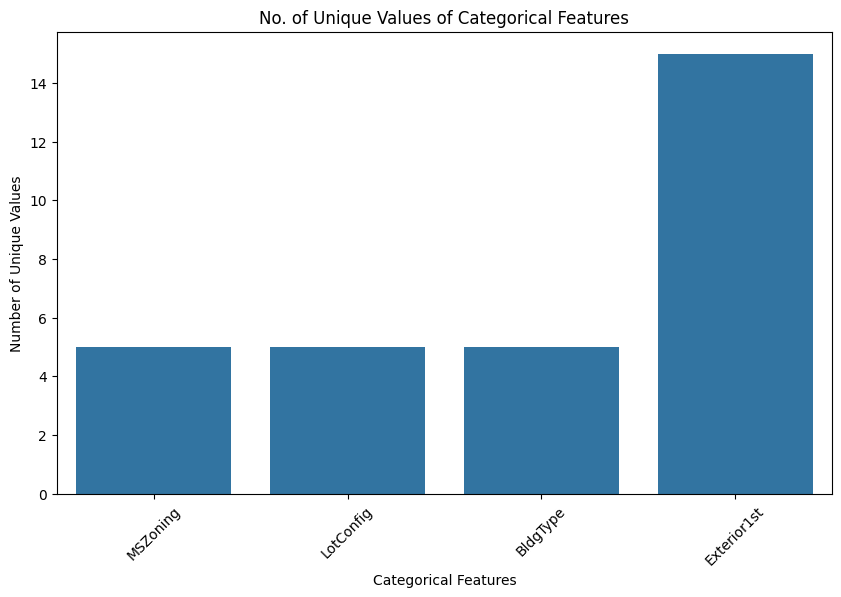

In [8]:
# Unique values of categorical features
unique_values = []
for col in object_cols:
    unique_values.append(dataset[col].nunique())

plt.figure(figsize=(10, 6))
plt.title('No. of Unique Values of Categorical Features')
plt.xticks(rotation=45)
sns.barplot(x=object_cols, y=unique_values)
plt.xlabel("Categorical Features")
plt.ylabel("Number of Unique Values")
plt.show()

# Distribution of Categorical Features 📊

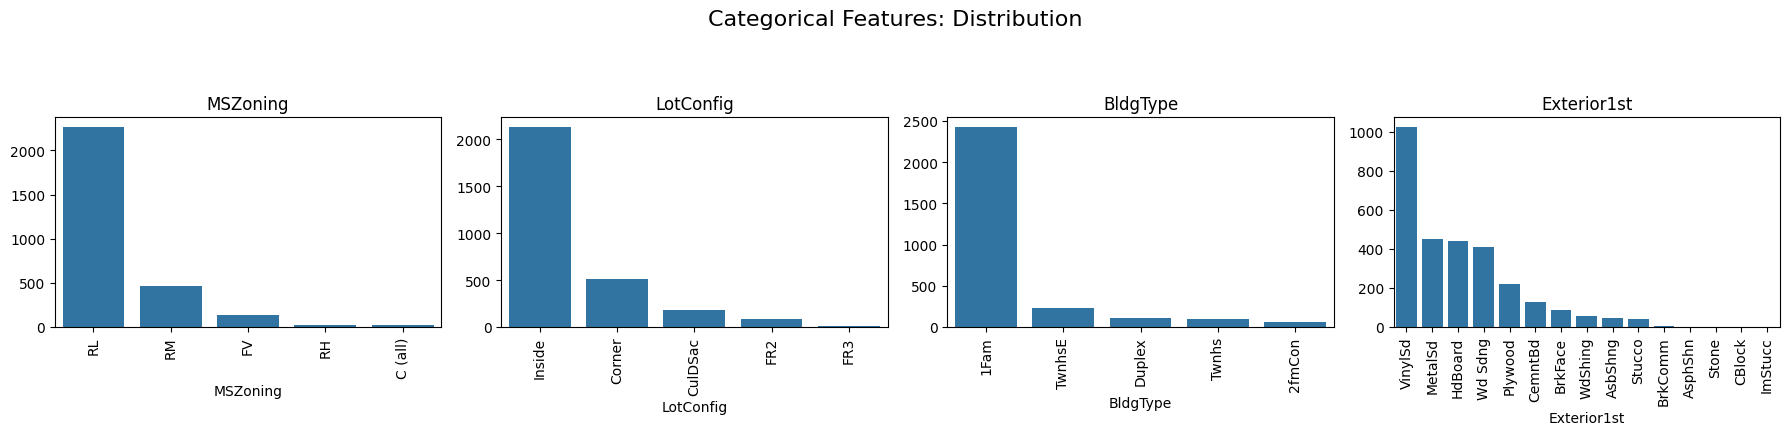

In [9]:
plt.figure(figsize=(18, 36))
plt.suptitle('Categorical Features: Distribution', fontsize=16)
for index, col in enumerate(object_cols, 1):
    plt.subplot(11, 4, index)
    sns.barplot(x=dataset[col].value_counts().index, y=dataset[col].value_counts().values)
    plt.xticks(rotation=90)
    plt.title(col)
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()


# Cleaning of unecessary and missing data 🧹

In [10]:
dataset.drop(['Id'], axis=1, inplace=True)
dataset['SalePrice'] = dataset['SalePrice'].fillna(dataset['SalePrice'].mean())
new_dataset = dataset.dropna()

# Re-identify categorical variables

In [11]:
s = (new_dataset.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables:", object_cols)
print('Number of categorical features:', len(object_cols))

Categorical variables: ['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st']
Number of categorical features: 4


# ONE HOT ENCODING 🎯

In [12]:
from sklearn.preprocessing import OneHotEncoder

OH_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
OH_cols = pd.DataFrame(OH_encoder.fit_transform(new_dataset[object_cols]))
OH_cols.index = new_dataset.index
OH_cols.columns = OH_encoder.get_feature_names_out()

df_final = new_dataset.drop(object_cols, axis=1)
df_final = pd.concat([df_final, OH_cols], axis=1)

# Splitting of data for training and testing

In [13]:
from sklearn.model_selection import train_test_split

X = df_final.drop(['SalePrice'], axis=1)
Y = df_final['SalePrice']
X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=0)

# ML MODEL : SUPPORT VECTOR MACHINE 🧱📏

In [19]:
from sklearn import svm
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error,r2_score

model_SVR = svm.SVR(C=100, epsilon=0.1, kernel='rbf')
model_SVR.fit(X_train, Y_train)
Y_preds = model_SVR.predict(X_valid)
print("SVR MAE:", mean_absolute_error(Y_valid, Y_preds))
print("SVR MAPE:", mean_absolute_percentage_error(Y_valid, Y_preds))
print("SVR R2:", r2_score(Y_valid, Y_preds))

SVR MAE: 28848.67394181072
SVR MAPE: 0.18705123901300952
SVR R2: 4.107281219245529e-06


# ML MODEL : RANDOM FOREST REGRESSOR 🌲

In [16]:
from sklearn.ensemble import RandomForestRegressor

model_RFR = RandomForestRegressor(n_estimators=10)
model_RFR.fit(X_train, Y_train)
Y_pred_rf = model_RFR.predict(X_valid)
print("Random Forest MAPE:", mean_absolute_percentage_error(Y_valid, Y_pred_rf))
print("Random Forest R2:", r2_score(Y_valid, Y_pred_rf))

Random Forest MAPE: 0.19261987545303721
Random Forest R2: 0.20002780333526493


# ML MODEL : LINEAR REGRESSOR 📈

In [17]:
from sklearn.linear_model import LinearRegression

model_LR = LinearRegression()
model_LR.fit(X_train, Y_train)
Y_pred_lr = model_LR.predict(X_valid)
print("Linear Regression MAPE:", mean_absolute_percentage_error(Y_valid, Y_pred_lr))
print("Linear Regression R2:", r2_score(Y_valid, Y_pred_lr))

Linear Regression MAPE: 0.1874168384159986
Linear Regression R2: 0.3741422704574465


# Actual vs Predicted plot for SVR

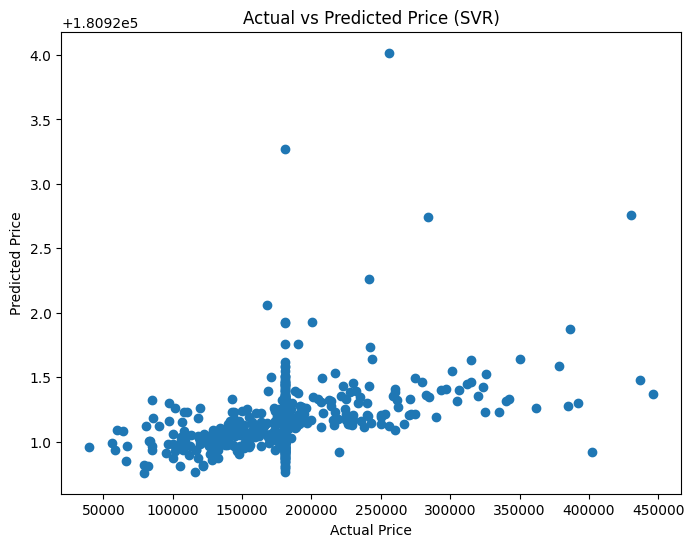

In [20]:
plt.figure(figsize=(8, 6))
plt.scatter(Y_valid, Y_preds)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price (SVR)")
plt.show()

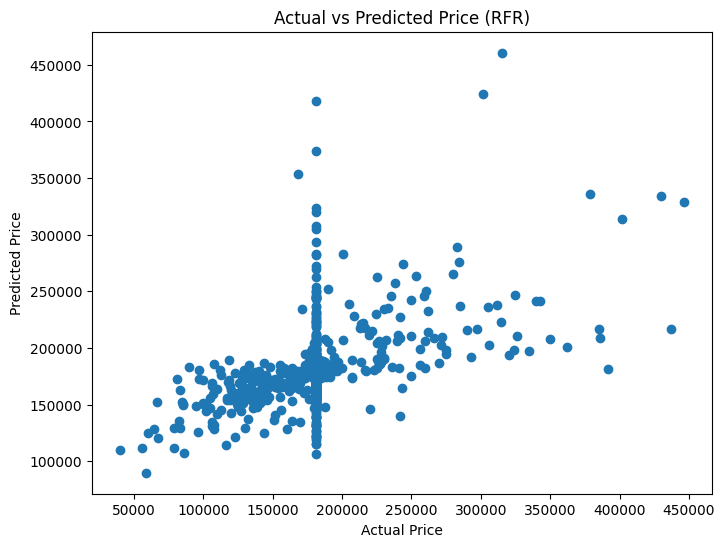

In [23]:
plt.figure(figsize=(8, 6))
plt.scatter(Y_valid, Y_pred_rf)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price (RFR)")
plt.show()

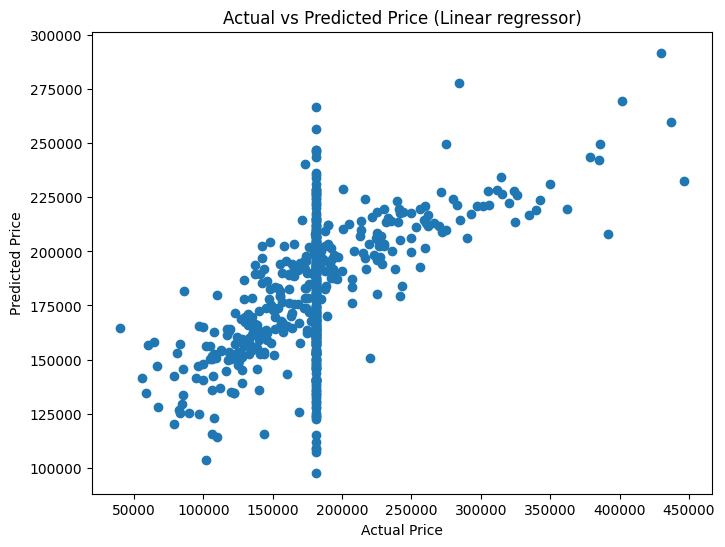

In [24]:
plt.figure(figsize=(8, 6))
plt.scatter(Y_valid, Y_pred_lr)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price (Linear regressor)")
plt.show()

# Predicting for a new house 🏠

In [25]:
new_house = pd.DataFrame({
    'MSSubClass': [110],
    'MSZoning': ["RM"],
    'LotArea': [9000],
    'LotConfig': ["FR2"],
    'BldgType': ["1Fam"],
    'OverallCond': [5],
    'YearBuilt': [2005],
    'YearRemodAdd': [2005],
    'Exterior1st': ["Wd Sdng"],
    'BsmtFinSF2': [30],
    'TotalBsmtSF': [1000]
})

# One-hot encoding for the new house

In [26]:
new_house_encoded = new_house.copy()
OH_cols_new = pd.DataFrame(OH_encoder.transform(new_house[object_cols]))
OH_cols_new.columns = OH_encoder.get_feature_names_out()
OH_cols_new.index = new_house.index

new_house_encoded.drop(object_cols, axis=1, inplace=True)
new_house_encoded = pd.concat([new_house_encoded, OH_cols_new], axis=1)

# Align columns with training data

In [27]:
new_house_encoded = new_house_encoded.reindex(columns=X_train.columns, fill_value=0)


# PREDICTING PRICE FOR NEW HOUSE

In [29]:
predicted_price = model_SVR.predict(new_house_encoded)
print("Predicted price for new house:", predicted_price[0])

Predicted price for new house: 180921.19810225157


# Feature Importance

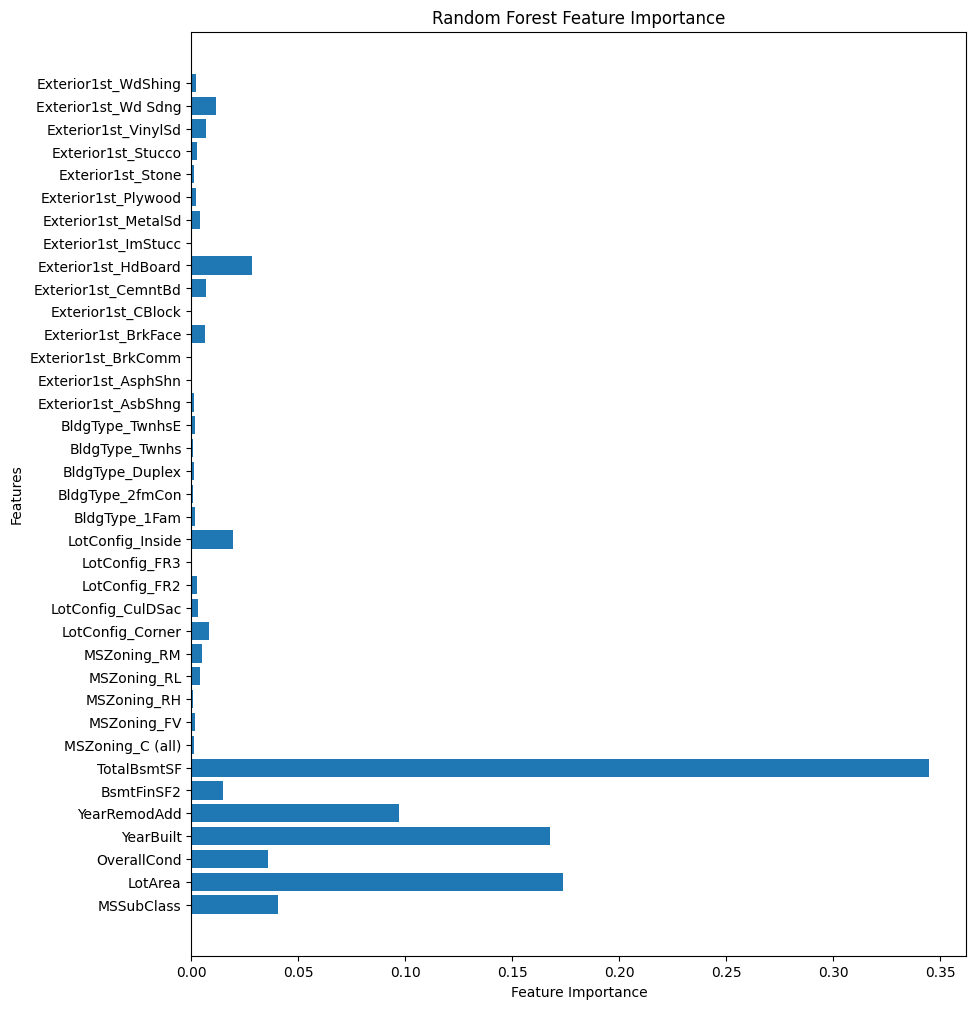

In [37]:
importances = model_RFR.feature_importances_
feature_names = X.columns
plt.figure(figsize=(10, 12))
plt.barh(range(len(importances)), importances, align='center')
plt.yticks(range(len(importances)), feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Random Forest Feature Importance')
plt.show()